             Avg         Max
count  42.000000   42.000000
mean   71.985714   87.535714
std     6.896078    8.840478
min    59.400000   68.900000
25%    66.750000   82.750000
50%    70.950000   89.150000
75%    74.825000   93.025000
max    88.000000  104.500000
Training RMSE (Max): 2.31
Testing RMSE (Max): 6.03


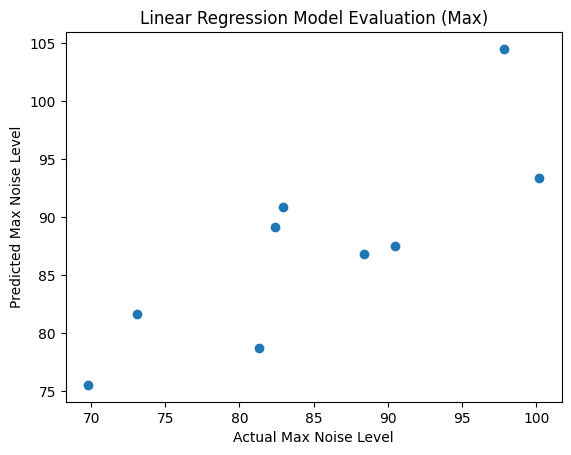

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load your data
data_path = 'noise_data.csv'
df = pd.read_csv(data_path)

# Data Analysis
# Display basic statistics of the dataset
print(df.describe())


# Data Preprocessing
# Convert categorical variables into numerical representations
df = pd.get_dummies(df, columns=['Location', 'Day', 'Time'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = df.drop(['Avg', 'Max'], axis=1)
y_max = df['Max']

# Split the data into training and testing sets
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)

# Linear Regression Model for Maximum Noise Level
max_model = XGBRegressor()
max_model.fit(X_train, y_max_train)

# Predictions
y_max_pred_train = max_model.predict(X_train)
y_max_pred_test = max_model.predict(X_test)

# Model Evaluation
print(f'Training RMSE (Max): {mean_squared_error(y_max_train, y_max_pred_train, squared=False):.2f}')
print(f'Testing RMSE (Max): {mean_squared_error(y_max_test, y_max_pred_test, squared=False):.2f}')

# Visualization
plt.scatter(y_max_test, y_max_pred_test)
plt.xlabel('Actual Max Noise Level')
plt.ylabel('Predicted Max Noise Level')
plt.title('Linear Regression Model Evaluation (Max)')
plt.show()


In [2]:
# Model Evaluation for Maximum Noise Level
print("\nEvaluation for Maximum Noise Level:")
print(f'Training RMSE (Max): {mean_squared_error(y_max_train, y_max_pred_train, squared=False):.2f}')
print(f'Testing RMSE (Max): {mean_squared_error(y_max_test, y_max_pred_test, squared=False):.2f}')
print(f'R-squared (Max): {max_model.score(X_test, y_max_test):.2f}')


Evaluation for Maximum Noise Level:
Training RMSE (Max): 2.31
Testing RMSE (Max): 6.03
R-squared (Max): 0.61


In [3]:
# Display the first few actual and predicted values
result_df_max = pd.DataFrame({'Actual (Max)': y_max_test, 'Predicted (Max)': y_max_pred_test})
print("\nSample of Actual vs. Predicted Values for Maximum Noise Level:")
print(result_df_max.head())


Sample of Actual vs. Predicted Values for Maximum Noise Level:
    Actual (Max)  Predicted (Max)
25          73.1        81.700455
13          97.8       104.497375
8           90.5        87.499588
26          69.8        75.554482
4          100.2        93.399864


In [5]:
from sklearn.metrics import r2_score
print("The test r2 score : {}",format(r2_score(y_max_test , y_max_pred_test))); 
print("The r2 score : {}",format(r2_score(y_max_train , y_max_pred_train))); 

The test r2 score : {} 0.6081860879496224
The r2 score : {} 0.9233509255716791
